In [1]:
import sys
sys.path.append('../../src/')

import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from utils.utils import train_data, plot_results


%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
name = "Reference"
activation = 'relu'
batch_size = 128
neurons_number = 64
epochs = 20
optimize = 'Adam'

In [3]:
# build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(neurons_number, input_shape=(1,), name='input', activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, name='output'))
# summary of the model
model.summary()
model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mse', 'mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 64)                128       
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 1)                 65        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [4]:
X_train, Y_train = train_data(start=0, end=0.8, number=10000)
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/20
63/63 [==============================] - 0s 4ms/step - loss: 0.0506 - mse: 0.0506 - mean_absolute_error: 0.1580 - val_loss: 1.2570e-04 - val_mse: 1.2570e-04 - val_mean_absolute_error: 0.0112
Epoch 2/20
63/63 [==============================] - 0s 823us/step - loss: 6.2725e-05 - mse: 6.2725e-05 - mean_absolute_error: 0.0054 - val_loss: 1.2667e-05 - val_mse: 1.2667e-05 - val_mean_absolute_error: 0.0035
Epoch 3/20
63/63 [==============================] - 0s 882us/step - loss: 1.0684e-05 - mse: 1.0684e-05 - mean_absolute_error: 0.0019 - val_loss: 3.9628e-06 - val_mse: 3.9628e-06 - val_mean_absolute_error: 0.0019
Epoch 4/20
63/63 [==============================] - 0s 866us/step - loss: 3.8517e-06 - mse: 3.8517e-06 - mean_absolute_error: 0.0011 - val_loss: 2.0747e-06 - val_mse: 2.0747e-06 - val_mean_absolute_error: 0.0014
Epoch 5/20
63/63 [==============================] - 0s 924us/step - loss: 1.5024e-06 - mse: 1.5024e-06 - mean_absolute_error: 5.4380e-04 - val_loss: 6.8931e-07 - 

In [5]:
X_test, Y_test = train_data(start=0, end=1.0, number=333)
loss, mse, mean_absolute_error = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 291us/step - loss: 2.9861e-06 - mse: 2.9861e-06 - mean_absolute_error: 8.4332e-04


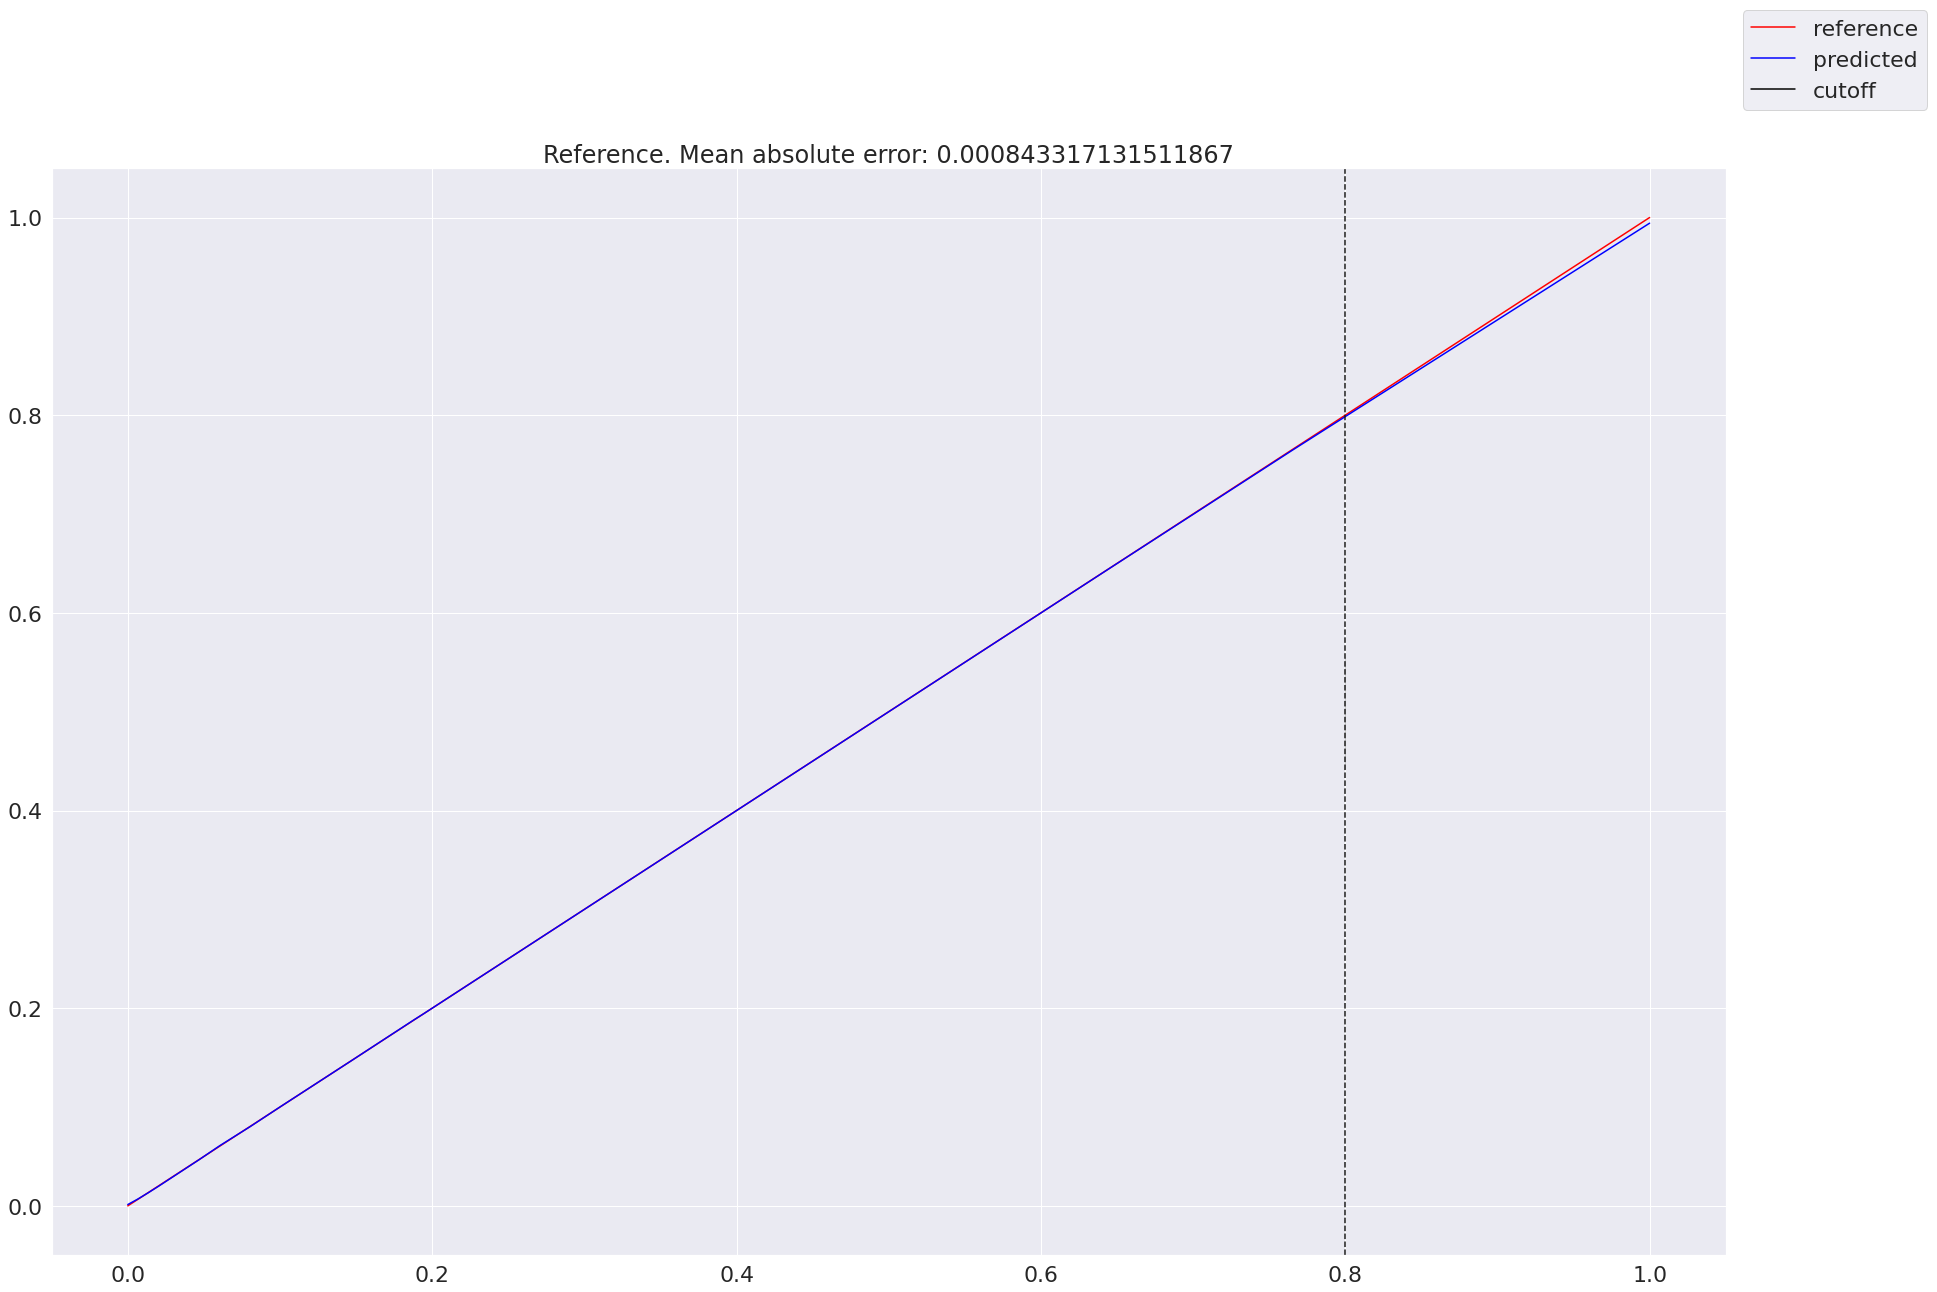

In [6]:
# %%
grid = np.linspace(0, 1.0, 150)
predicted = model.predict(grid).reshape((150,))

plot_results(grid, predicted, name, mean_absolute_error, 0.8)